In [4]:
import pandas as pd

food = pd.read_csv('food.csv')
food_data = food.drop(columns=[' Label' ])
food_data.describe()

,Calories,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


In [5]:
food_data

,NAME,Calories,Protein,Fat,Calcium,Iron
0,BEEF BRAISED,340,20,28,9,2.6
1,HAMBURGER,245,21,17,9,2.7
2,BEEF ROAST,420,15,39,7,2.0
3,BEEF STEAK,375,19,32,9,2.6
4,BEEF CANNED,180,22,10,17,3.7
5,CHICKEN BROILED,115,20,3,8,1.4
6,CHICKEN CANNED,170,25,7,12,1.5
7,BEEF HEART,160,26,5,14,5.9
8,LAMB LEG ROAST,265,20,20,9,2.6
9,LAMB SHOULDER ROAST,300,18,25,9,2.3


In [6]:
food_data.dtypes

NAME          object
 Calories      int64
 Protein       int64
 Fat           int64
 Calcium       int64
 Iron        float64
dtype: object

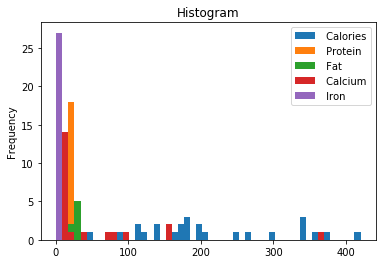

In [7]:
# To determine which method to use to find outliers, we plot histogram of the variable and 
# look at its distribution
import seaborn as sns
food_data.plot.hist(bins=50, title='Histogram')

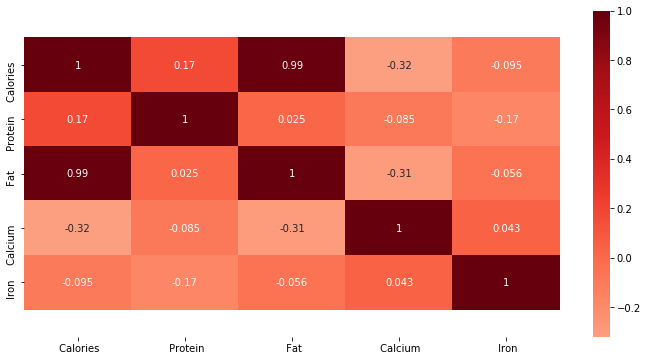

In [8]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,6))

sns.heatmap(food_data.corr(),center=0,cmap='Reds',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

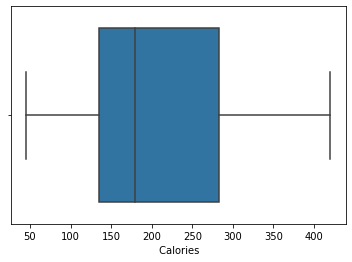

In [13]:
# Detecting ouliers using the boxplot
import seaborn as sns 
sns.boxplot(food_data[' Calories'])

[ 0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0
  0  0  0]


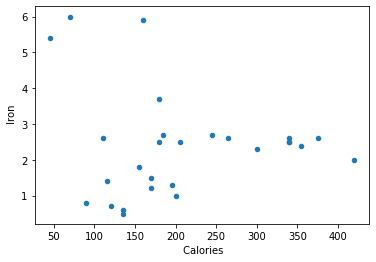

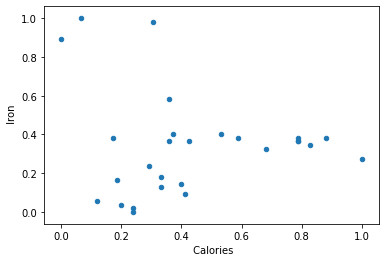

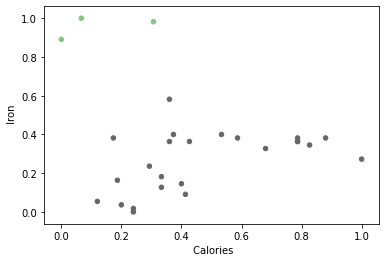

In [10]:
'''
using DBSCAN that uses clustering... Calculate distance between points and look for points which are far away
from others...
'''
# Comparing calories,Iron and Calcium (Before normalization)
calories_iron = food_data[[' Calories', ' Iron']]
calories_iron.plot.scatter(x=' Calories', y=' Iron')

'''Since the variable will have different scales, they should be normalized..'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
calories_iron = scaler.fit_transform(calories_iron)
calories_iron = pd.DataFrame(calories_iron, columns=[' Calories',' Iron'])
calories_iron.plot.scatter(x=' Calories', y=' Iron')

''' DBSCAN Assigns points to clusters and returns the labels. If it returns -1, it means
the value is an outlier'''
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.2,metric='euclidean',min_samples=5,n_jobs=-1)
clusters = outlier_detection.fit_predict(calories_iron)
print(clusters)

# Plotting the graph with outliers
from matplotlib import cm
cmap = cm.get_cmap('Accent')
calories_iron.plot.scatter(
    x=' Calories',
    y=' Iron',
    c=clusters,
    cmap = cmap,
    colorbar = False
)

[ 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0
  0  0  0]


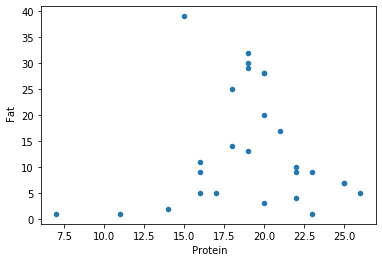

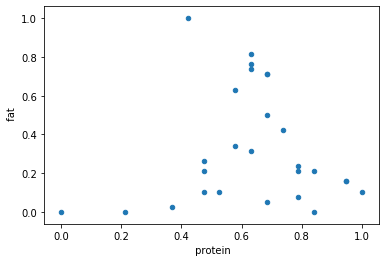

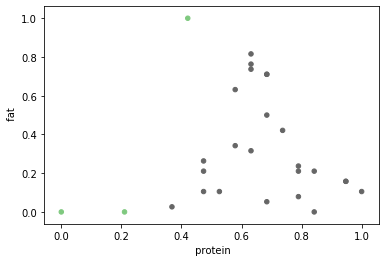

In [73]:
'''
using DBSCAN that uses clustering... Calculate distance between points and look for points which are far away
from others...
'''
# Comparing protein,fat and Calcium (Before normalization)
protein_fat = food_data[[' Protein', ' Fat']]
protein_fat.plot.scatter(x=' Protein', y=' Fat')

'''Since the variable will have different scales, they should be normalized..'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
protein_fat = scaler.fit_transform(protein_fat)
protein_fat = pd.DataFrame(protein_fat, columns=[' protein',' fat'])
protein_fat.plot.scatter(x=' protein', y=' fat')

''' DBSCAN Assigns points to clusters and returns the labels. If it returns -1, it means
the value is an outlier'''
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.2,metric='euclidean',min_samples=5,n_jobs=-1)
clusters = outlier_detection.fit_predict(protein_fat)
print(clusters)

# Plotting the graph with outliers
from matplotlib import cm
cmap = cm.get_cmap('Accent')
protein_fat.plot.scatter(
    x=' protein',
    y=' fat',
    c=clusters,
    cmap = cmap,
    colorbar = False
)

[ 0  1  0  0  1  1  1  1  0  0  0  0  0  1  1  1  1  1  1  1  1 -1  1 -1
 -1  1  1]


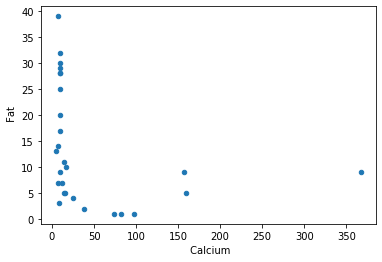

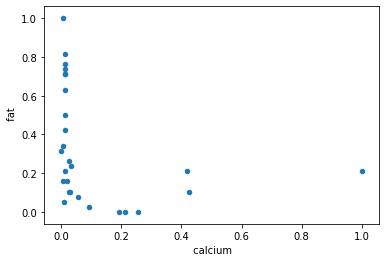

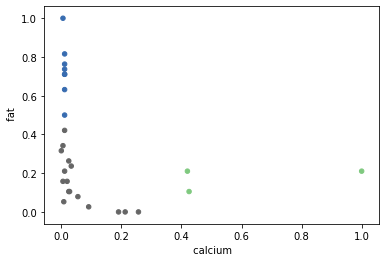

In [63]:
'''
using DBSCAN that uses clustering... Calculate distance between points and look for points which are far away
from others...
'''
# Comparing calcium,fat and Calcium (Before normalization)
calcium_fat = food_data[[' Calcium', ' Fat']]
calcium_fat.plot.scatter(x=' Calcium', y=' Fat')

'''Since the variable will have different scales, they should be normalized..'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
calcium_fat = scaler.fit_transform(calcium_fat)
calcium_fat = pd.DataFrame(calcium_fat, columns=[' calcium',' fat'])
calcium_fat.plot.scatter(x=' calcium', y=' fat')

''' DBSCAN Assigns points to clusters and returns the labels. If it returns -1, it means
the value is an outlier'''
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.2,metric='euclidean',min_samples=7,n_jobs=-1)
clusters = outlier_detection.fit_predict(calcium_fat)
print(clusters)

# Plotting the graph with outliers
from matplotlib import cm
cmap = cm.get_cmap('Accent')
calcium_fat.plot.scatter(
    x=' calcium',
    y=' fat',
    c=clusters,
    cmap = cmap,
    colorbar = False
)

[0.17567993 0.05527745 0.23860984 0.24651915 0.28391363]


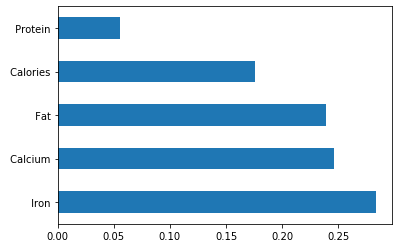

In [83]:
# To find the relevant attributes using feature importance...
# Separate target from the independent columns
X = food_data.drop(columns=['NAME'])
y = food[' Label'].values

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()



In [12]:
# ?Check for null values
food.isna()


,NAME,Calories,Protein,Fat,Calcium,Iron,Label
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False
